## Introduction 
![featured image](https://storage.googleapis.com/idx-acnt-gs.ihouseprd.com/AR658975/file_manager/increase.jpg)
This Kernel is meant to solve the Housing Prices Challenge in a simple way, very much understandable for beginners at the same time being able to produce a great LB score.  

Predicting Housing Prices is one of the very first things you must be able to do as at the start of your Data Science career. Our goal here is to build a machine learning model that can predict housing prices with good accuracy provided a great set of features which we'll extract from the training data for this competition. The performance of our model is evaluated based on a metric called Root-Mean-Squared-Error(RMSE). If you haven't yet read the competition desciption I strongly suggest you to go out and read it first up [here](http://https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description). One of primary objectives of this kernel is to make things look simple enough code-wise for beginners so that they can understand, replicate and reproduce better models in the future. Without further ado, let's jump right in. 

**And by the way if you like this Kernel please give it an upvote.**

## Import all the necessary packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.width', 1000)

# Plotting Tools
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Import Sci-Kit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold

# Ensemble Models
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Package for stacking models
from vecstack import stacking

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))

from IPython.display import display, HTML
display(HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
"""))

['top-submissions', 'house-prices-advanced-regression-techniques']


In [2]:
def show_all(df):
    #This fuction lets us view the full dataframe
    with pd.option_context('display.max_rows', 100, 'display.max_columns', 100):
        display(df)

## Importing Data

In [3]:
# Bring training data into the environment
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')

# Bring test data into the environment
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

show_all(train.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Oh looks like there are a ton of columns(features).

## Data Exploration, Engineering and Cleaning 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

We can see that there are a lot of missing values in a number of columns. I'll come on to fixing that soon. The target variable for us is the SalePrice. 

In [5]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Lets make a plot to intuitively understand what's missing in our data and where it is missing.

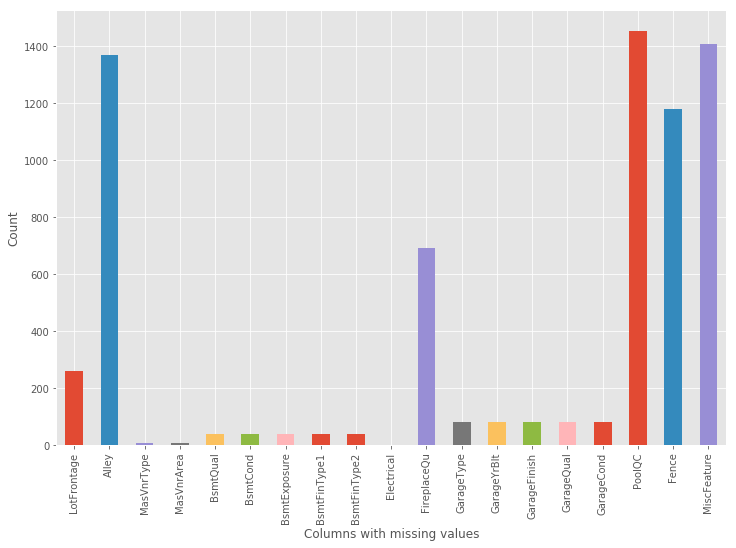

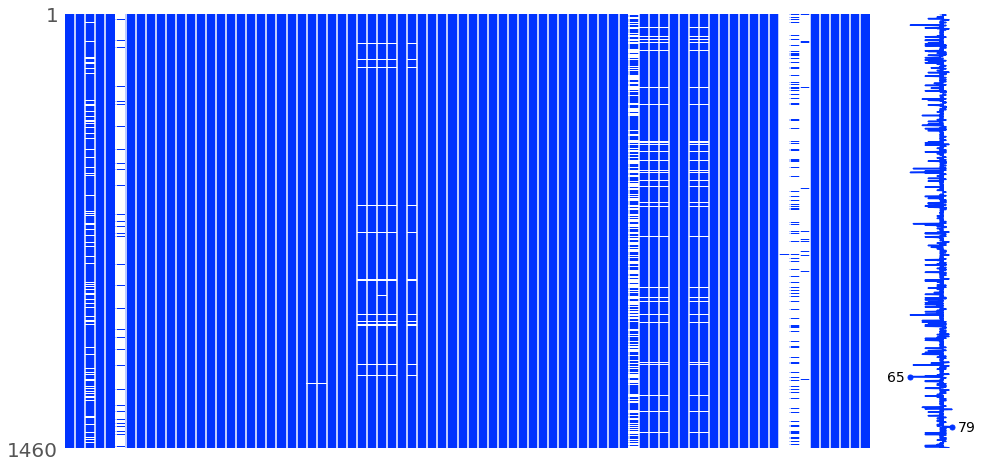

In [6]:
# Plot missing values 
def plot_missing(df):
    # Find columns having missing values and count
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    #missing.sort_values(inplace=True)
    
    # Plot missing values by count 
    missing.plot.bar(figsize=(12,8))
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count')
    
    # search for missing data
    import missingno as msno
    msno.matrix(df=df, figsize=(16,8), color=(0,0.2,1))
    
plot_missing(train)

#### Fixing the missing data

In [7]:
# # IMPUTING MISSING VALUES
def fill_missing_values(df):
    ''' This function imputes missing values with median for numeric columns 
        and most frequent value for categorical columns'''
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    for column in list(missing.index):
        if df[column].dtype == 'object':
            df[column].fillna(df[column].value_counts().index[0], inplace=True)
        elif df[column].dtype == 'int64' or 'float64' or 'int16' or 'float16':
            df[column].fillna(df[column].median(), inplace=True)

In [8]:
fill_missing_values(train)
train.isnull().sum().max()

0

#### Now the test set also needs attention

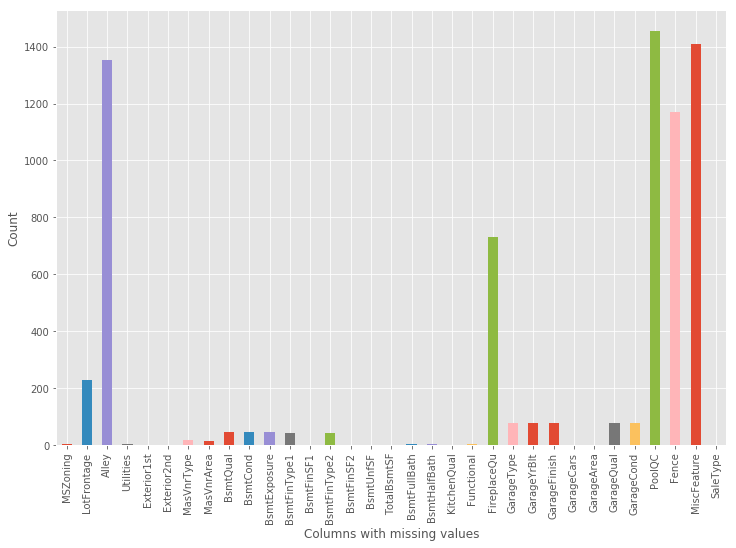

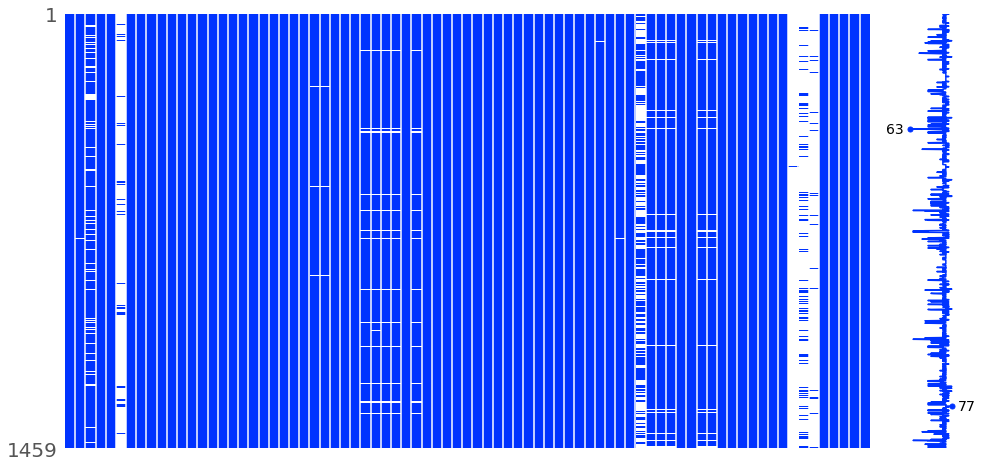

In [9]:
# Using the function written above to visualize missing values
plot_missing(test)

#### Fixing missing data in test set

In [10]:
fill_missing_values(test)
test.isnull().sum().max()

0

### Imputing Categorical variables
As we have quite a lot of columns with textual and categorical data we have to impute them with numerics because ML models can only work with numbers.

In [11]:
def impute_cats(df):
    '''This function converts categorical and non-numeric 
       columns into numeric columns to feed into a ML algorithm'''
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # Encode the categorical columns with numbers    
    label_enc = LabelEncoder()
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])

In [12]:
# Impute the missing values
impute_cats(train)
impute_cats(test)
print("Train Dtype counts: \n{}".format(train.dtypes.value_counts()))
print("Test Dtype counts: \n{}".format(test.dtypes.value_counts()))

Train Dtype counts: 
int64      77
float64     3
dtype: int64
Test Dtype counts: 
int64      68
float64    11
dtype: int64


### Understanding our data

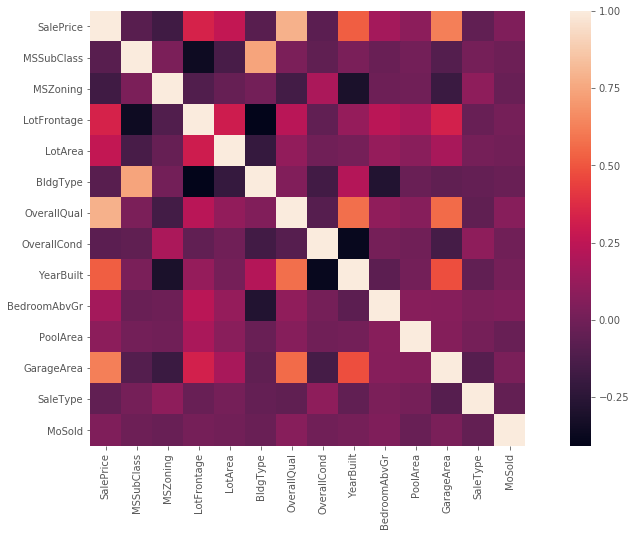

In [13]:
corr_mat = train[["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea", "BldgType",
                       "OverallQual", "OverallCond","YearBuilt", "BedroomAbvGr", "PoolArea", "GarageArea",
                       "SaleType", "MoSold"]].corr()
# corr_mat = train.corr()
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr_mat, vmax=1 , square=True)

We can see that the features OverallQual, GarageArea and YearBuilt are closely correlated with the sale price. That means these features play an important role in determining the SalePrice of a house. 
Similarly a lot of inferences can be made just by looking at the heatmap but we're not going to go through each one of them. If you don't know what a heatmap is and wish to learn, I strongly recommend checking out [this video](https://www.youtube.com/watch?v=oMtDyOn2TCc).

#### Visulaizing the relationship between SalePrice and YearBuilt

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


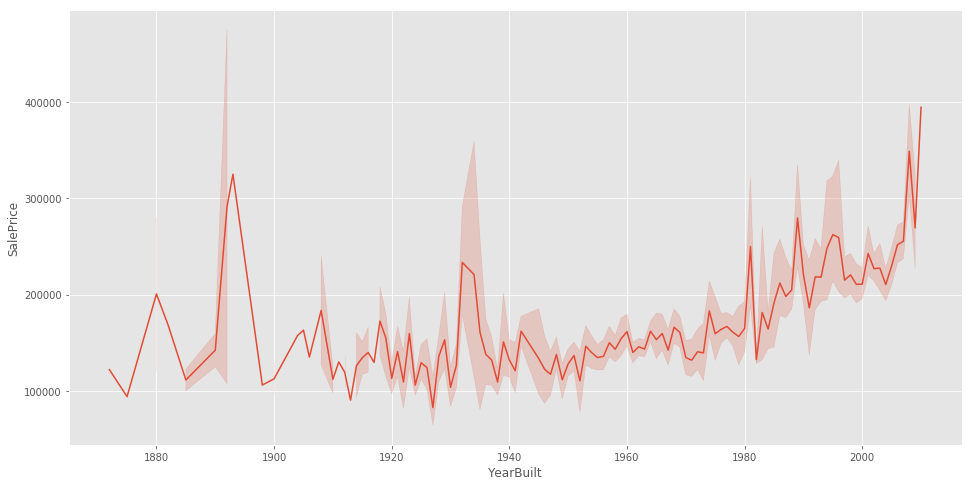

In [14]:
f, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x='YearBuilt', y='SalePrice', data=train)

You might have noticed a significant increase in SalePrices just after the start of the 21st century, which is pretty interesting. What's even more surprising is the late 1800s saw phenomenal increase in SalePrices but dropping way below even before the end of that century.

#### Visualizing the relationship between Sale prices and Overall Quality 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


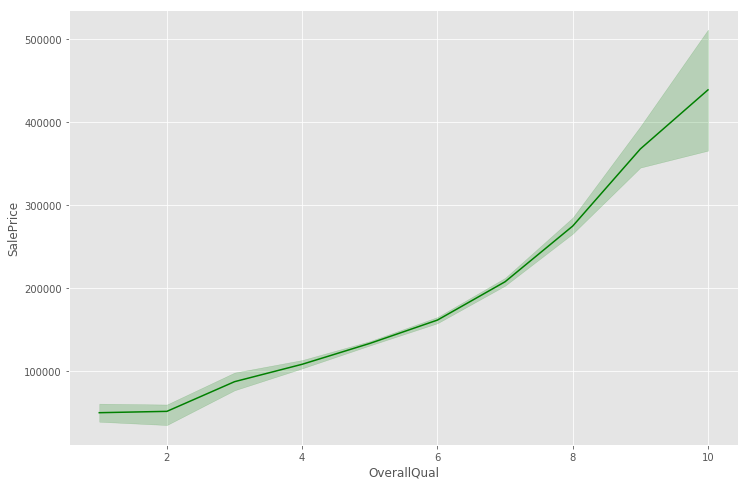

In [15]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='OverallQual', y='SalePrice', color='green',data=train)

We can see that the SalePrices increase rapidly with houses with better overall quality which is pretty reasonable.

#### Visulizing the Distribution of SalePrice

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


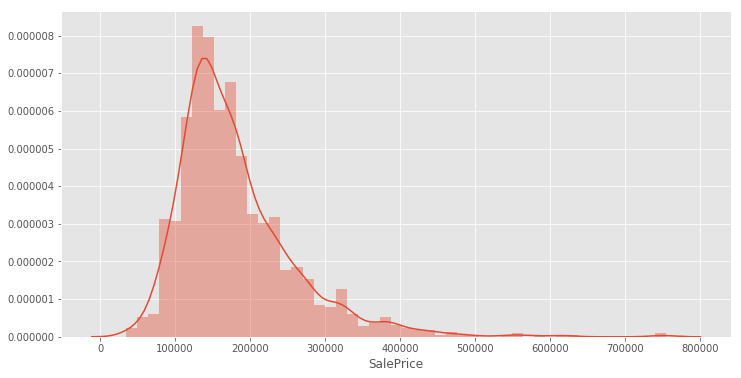

In [16]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(train['SalePrice'])

It's clear that most of the houses, about 80% are sold for a price in the region on 100,000 and 200,000 dollars. Looks like there are a lot of houses sold in the mid 100,000s which makes up most of the data.

#### Visualizing the relationship between SalePrice and SaleType

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


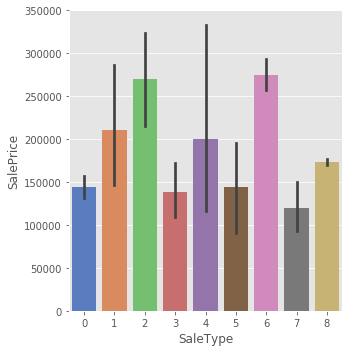

In [17]:
sns.catplot(x='SaleType', y='SalePrice', data=train, kind='bar', palette='muted')

It is clear that the selling prices for Sale types 2 and 6 are significantly higher than the others.

### Preparing the Data to do Machine Learning

In [18]:
X = train.drop('SalePrice', axis=1)
y = np.ravel(np.array(train[['SalePrice']]))
print(y.shape)

(1460,)


In [19]:
# Use train_test_split from sci-kit learn to segment our data into train and a local testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Define Evaluation Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

![RMSE formula](https://gisgeography.com/wp-content/uploads/2014/07/rmse-formula1-300x96.png)
 
We will write a function named rmse to perform this task.

In [20]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

## Modelling

We'll start by building standalone models, validating their performance and picking the right ones. Later we will stack all our models into an ensemble for better accuracy.

I just played with a number of models and ended up picking the following models which gave me best results personally. If you find a better way please let me know :)

I tuned the hyperparameters by manually experimenting a lot based on previous experiences, saving you a bunch of time hopefully. Anyways if you find a set of parameters that can work even better let me know in the comments down below. 

### Random Forest

In [21]:
# Initialize the model
random_forest = RandomForestRegressor(n_estimators=1200,
                                      max_depth=15,
                                      min_samples_split=5,
                                      min_samples_leaf=5,
                                      max_features=None,
                                      random_state=42,
                                      oob_score=True
                                     )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(random_forest, X, y, cv=kf, n_jobs=-1)
y_pred.mean()

0.8494340388440896

In [22]:
# Fit the model to our data
random_forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [23]:
# Make predictions on test data
rf_pred = random_forest.predict(test)

### XG Boost

Note: I found that our standalone XGBoost model in itself gives a good score. I suggest you to check it out.

In [24]:
# Initialize our model
xg_boost = XGBRegressor( learning_rate=0.01,
                         n_estimators=6000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7,
                         colsample_bytree=0.2,
                         objective='reg:linear', nthread=-1,
                         scale_pos_weight=1, seed=27,
                         reg_alpha=0.00006
                       )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(xg_boost, X, y, cv=kf, n_jobs=-1)
y_pred.mean()

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.8986720744143606

In [25]:
# Fit our model to the training data
xg_boost.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.6, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=6000, n_jobs=1,
       nthread=-1, objective='reg:linear', random_state=0, reg_alpha=6e-05,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.7)

In [26]:
# Make predictions on the test data
xgb_pred = xg_boost.predict(test)

### Gradient Boost Regressor(GBM)

In [27]:
# Initialize our model
g_boost = GradientBoostingRegressor( n_estimators=6000, learning_rate=0.01,
                                     max_depth=5, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42
                                   )

# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(g_boost, X, y, cv=kf, n_jobs=-1)
y_pred.mean()

0.8914454142357885

In [28]:
# Fit our model to the training data
g_boost.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=6000,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [29]:
# Make predictions on test data
gbm_pred = g_boost.predict(test)

 ### LightGBM

In [30]:
# Initialize our model
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.01, 
                                       n_estimators=6400,
                                       verbose=-1,
                                       bagging_fraction=0.80,
                                       bagging_freq=4, 
                                       bagging_seed=6,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                    )

# Perform cross-validation to see how well our model does
kf = KFold(n_splits=5)
y_pred = cross_val_score(lightgbm, X, y, cv=kf)
print(y_pred.mean())

0.8920654944323145


In [31]:
# Fit our model to the training data
lightgbm.fit(X,y)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=6,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=7,
       importance_type='split', learning_rate=0.01, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=6400, n_jobs=-1, num_leaves=6, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbose=-1)

In [32]:
# Make predictions on test data
lgb_pred = lightgbm.predict(test)

## Model Stacking

Stacking (also called meta ensembling) is a model ensembling technique used to combine information from multiple predictive models to generate a new model which usually performs better.
In this project we use python package called **vecstack** that helps us stack our models which we have imported earlier. It's actually very easy to use, you can have a look at the [documentation](https://github.com/vecxoz/vecstack) for more information.  

In [33]:
# List of the models to be stacked
models = [g_boost, xg_boost, lightgbm, random_forest]

In [34]:
# Perform Stacking
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=True,
                           mode='oof_pred_bag',
                           metric=rmse,
                           n_folds=5,
                           random_state=25,
                           verbose=2
                          )

task:         [regression]
metric:       [rmse]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [GradientBoostingRegressor]
    fold  0:  [0.13673076]
    fold  1:  [0.10603395]
    fold  2:  [0.12231723]
    fold  3:  [0.13875122]
    fold  4:  [0.12860575]
    ----
    MEAN:     [0.12648778] + [0.01179448]
    FULL:     [0.12702464]

model  1:     [XGBRegressor]
    fold  0:  [0.12997383]
    fold  1:  [0.10127865]
    fold  2:  [0.11446387]
    fold  3:  [0.13603290]
    fold  4:  [0.12478926]
    ----
    MEAN:     [0.12130770] + [0.01226422]
    FULL:     [0.12191083]

model  2:     [LGBMRegressor]
    fold  0:  [0.13877188]
    fold  1:  [0.10694519]
    fold  2:  [0.12538364]
    fold  3:  [0.13996528]
    fold  4:  [0.12957698]
    ----
    MEAN:     [0.12812859] + [0.01193110]
    FULL:     [0.12867204]

model  3:     [RandomForestRegressor]
    fold  0:  [0.18861441]
    fold  1:  [0.11921948]
    fold  2:  [0.14909124]
    fold  3:  [0.14686416]
    fold  4:  [

In [35]:
# Initialize 2nd level model
xgb_lev2 = XGBRegressor(learning_rate=0.1, 
                        n_estimators=500,
                        max_depth=3,
                        n_jobs=-1,
                        random_state=17
                       )

# Fit the 2nd level model on the output of level 1
xgb_lev2.fit(S_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=17, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [36]:
# Make predictions on the localized test set
stacked_pred = xgb_lev2.predict(S_test)
print("RMSE of Stacked Model: {}".format(rmse(y_test,stacked_pred)))

RMSE of Stacked Model: 0.14866853446947903


## Prediction

Now it is finally time to make predictions on the real world test data. The approach here might look strange to you. You can visit this [link](https://github.com/vecxoz/vecstack/issues/4) to understand how it is done. 

#### Prediction on Stacked Layer 1

In [37]:
y1_pred_L1 = models[0].predict(test)
y2_pred_L1 = models[1].predict(test)
y3_pred_L1 = models[2].predict(test)
y4_pred_L1 = models[3].predict(test)
S_test_L1 = np.c_[y1_pred_L1, y2_pred_L1, y3_pred_L1, y4_pred_L1]

#### Final Prediction

In [38]:
test_stacked_pred = xgb_lev2.predict(S_test_L1)

In [39]:
# Save the predictions in form of a dataframe
submission = pd.DataFrame()

submission['Id'] = np.array(test.index)
submission['SalePrice'] = test_stacked_pred

#### Blending with top kernels

In [40]:
top_public = pd.read_csv('../input/top-submissions/submission (9).csv')

In [41]:
final_blend = (0.8*top_public.SalePrice.values + 0.2*test_stacked_pred)

blended_submission = pd.DataFrame()

blended_submission['Id'] = np.array(test.index)
blended_submission['SalePrice'] = final_blend

### Create Submission Files

In [42]:
submission.to_csv('submission.csv', index=False)
blended_submission.to_csv('blended_submission.csv', index=False) # Best LB Score

i hope that was helpful. Thanks for being here, if you like this kernel **please upvote**. If you have any suggestions drop them down below. 

Until next time, Happy Kaggling! :)